In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('blood.csv')

# Preview the data
df.head()


,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
# Dataset structure
print("Shape of the dataset:", df.shape)

# Info about data types and nulls
print("\nDataset Info:")
df.info()

# Basic statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Shape of the dataset: (748, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB

Summary statistics:
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


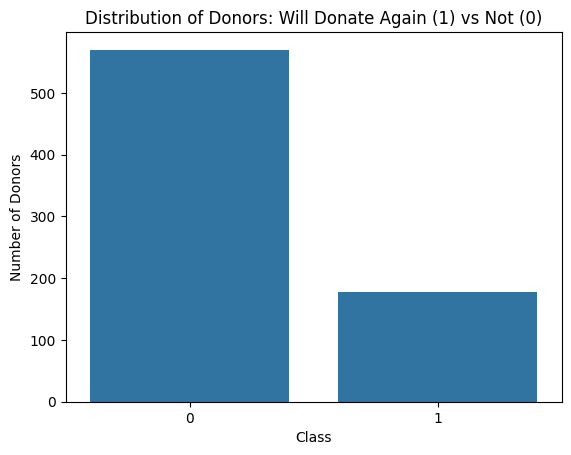

In [ ]:
#Target Class Distribution
sns.countplot(x='Class', data=df)
plt.title('Distribution of Donors: Will Donate Again (1) vs Not (0)')
plt.xlabel('Class')
plt.ylabel('Number of Donors')
plt.show()


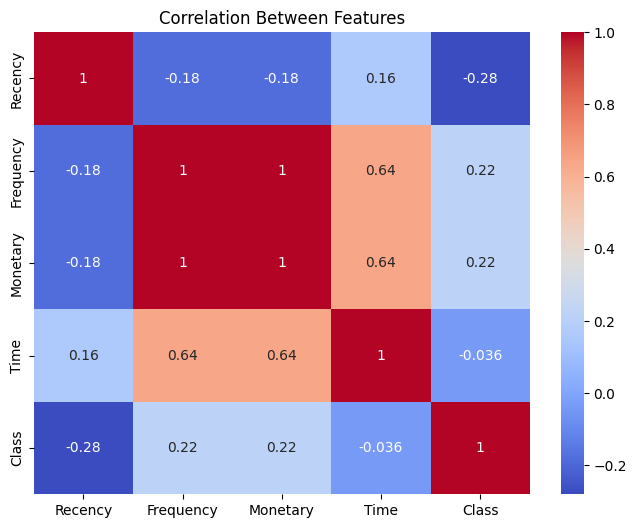

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


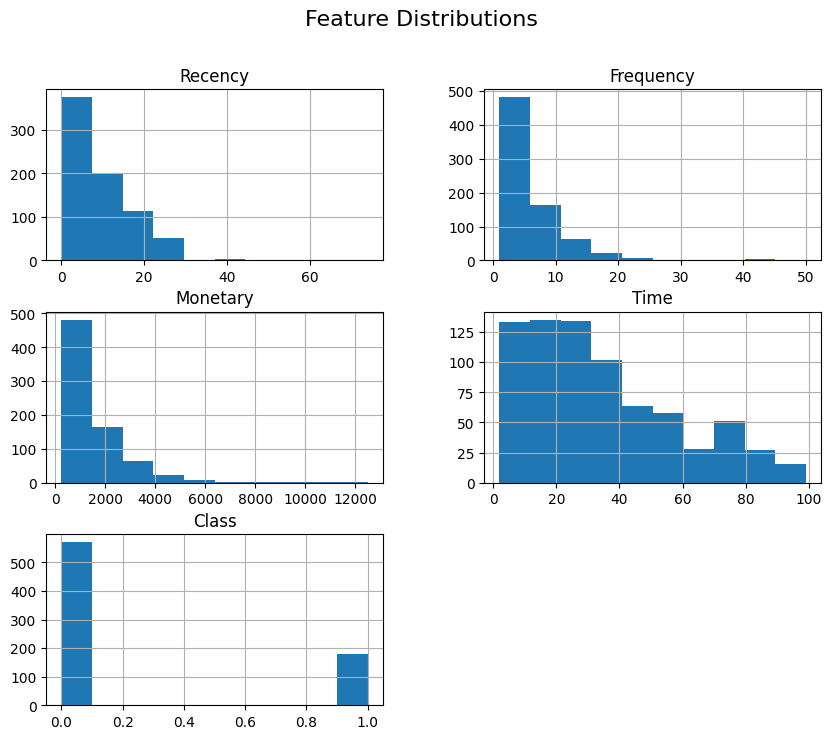

In [ ]:
#Feature Distributions
df.hist(figsize=(10,8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()



In [ ]:
#Prepare Data for Modeling
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop('Class', axis=1)
y = df['Class']

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Scale features (important for logistic regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predict
y_pred_log = log_model.predict(X_val_scaled)

# Evaluate
print("📊 Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_log))
print("\nClassification Report:\n", classification_report(y_val, y_pred_log))


📊 Logistic Regression Accuracy: 0.76

Confusion Matrix:
 [[110   3]
 [ 33   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       113
           1       0.57      0.11      0.18        37

    accuracy                           0.76       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.72      0.76      0.69       150



In [ ]:
#Train a Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train a Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_val)

# Evaluate
print("🌳 Decision Tree Accuracy:", accuracy_score(y_val, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_val, y_pred_tree))


🌳 Decision Tree Accuracy: 0.6266666666666667

Confusion Matrix:
 [[86 27]
 [29  8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       113
           1       0.23      0.22      0.22        37

    accuracy                           0.63       150
   macro avg       0.49      0.49      0.49       150
weighted avg       0.62      0.63      0.62       150



In [ ]:
#Try Oversampling with SMOTE
# Install imbalanced-learn if not already
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE on the full data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split resampled data
X_train_sm, X_val_sm, y_train_sm, y_val_sm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
#Train a Random Forest on SMOTE Data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

# Predict on validation set
y_pred_rf = rf_model.predict(X_val_sm)

# Evaluate
print("🌲 Random Forest Accuracy:", accuracy_score(y_val_sm, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_val_sm, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_val_sm, y_pred_rf))


🌲 Random Forest Accuracy: 0.7543859649122807

Confusion Matrix:
 [[85 37]
 [19 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.75       122
           1       0.70      0.82      0.76       106

    accuracy                           0.75       228
   macro avg       0.76      0.76      0.75       228
weighted avg       0.76      0.75      0.75       228



In [ ]:
#Try XGBoost (Advanced but Powerful)
!pip install xgboost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb_model.predict(X_val_sm)

print("🚀 XGBoost Accuracy:", accuracy_score(y_val_sm, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_val_sm, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_val_sm, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:10:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🚀 XGBoost Accuracy: 0.7631578947368421

Confusion Matrix:
 [[86 36]
 [18 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.70      0.76       122
           1       0.71      0.83      0.77       106

    accuracy                           0.76       228
   macro avg       0.77      0.77      0.76       228
weighted avg       0.77      0.76      0.76       228



✅ Final Model Comparison Summary
Model	Accuracy	Recall (Class 1)	Precision (Class 1)	F1-Score (Class 1)
Logistic Regression	76%	11%	57%	18%
Decision Tree	63%	22%	23%	22%
Random Forest + SMOTE	75.4%	82%	70%	76%
XGBoost + SMOTE	76.3%	83%	71%	77%

🔍 Insights:
Ensemble models (Random Forest and XGBoost) dramatically improved recall for donor class (Class 1)

XGBoost performs the best overall, with balanced precision, recall, and F1-score

SMOTE oversampling helped overcome the original class imbalance that was hurting earlier models



In [ ]:
# Example: export your resampled and labeled data
final_df = pd.DataFrame(X_val_sm, columns=X.columns)
final_df['Predicted Class'] = y_pred_xgb
final_df['Actual Class'] = y_val_sm.values

# Save to CSV
final_df.to_csv('health_predictions.csv', index=False)
